In [2]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *
from gui.user_code import pretty_names

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


wins [9, 13, 14, 11, 10, 15, 12]
algo has 3500 values
comp has 3500 values
folds has 3500 values
score has 3500 values


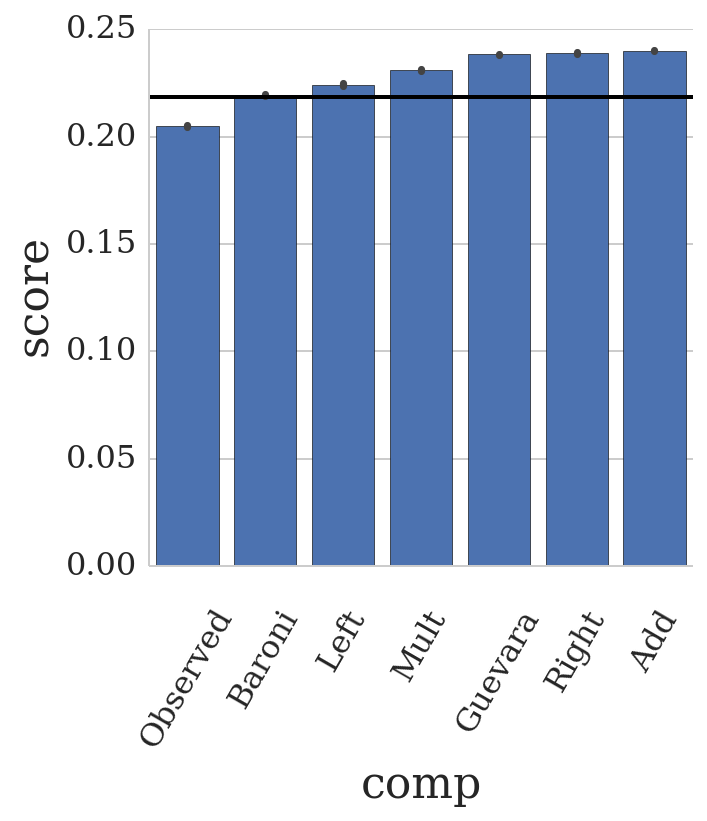

In [4]:
d1 = {
    'document_features_ev': 'AN+NN',
    'document_features_tr': 'J+N+AN+NN',
    'labelled': 'amazon_grouped-tagged',
    'expansions__allow_overlap': 0,
    'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
    'expansions__entries_of_id': None,
    'expansions__k': 3,
    'expansions__neighbour_strategy': 'linear',
    'expansions__noise': 0.0,
    'expansions__use_random_neighbours': 0,
    'expansions__use_similarity': 0,
    'expansions__vectors__algorithm': 'count_windows',
    'expansions__vectors__dimensionality': 100,
    'expansions__vectors__rep': 0,
    'expansions__vectors__unlabelled': 'gigaw',
    'expansions__vectors__unlabelled_percentage': 100,
    'expansions__vectors__use_ppmi': 0
     }

def _get(d):
    return [x.id for x in Experiment.objects.filter(**d).\
            order_by('expansions__vectors__algorithm', 'expansions__vectors__composer')]

wins = _get(d1)
print('wins', wins)
fields_to_include = {'algo':'expansions__vectors__algorithm', 
                     'comp':'expansions__vectors__composer'}
df = dataframe_from_exp_ids(wins, fields_to_include)

g = sns.factorplot(x='comp', y='score', data=df, kind='bar',
                  x_order=sort_df_by(df, 'comp'));
g.set_xticklabels(rotation=60);
plt.axhline(random_vect_baseline(), color='black');